# Fully Connected Neural Networks using Keras #

For this example we'll build a 'simple' multilayer neural network classifier for the [Water Quality and Potability dataset](https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability). This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

As usual, the first step will be importing the relevant modules:
-  [Tensorflow](https://www.tensorflow.org/): End-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that can be used for a range of tasks, with a particular focus on Deep Learning. Released by Google as an open source project in 2015 (v1) and updated to TensorFlow 2.0 in 2019. It is designed to support a wide range of machine learning and deep learning tasks, from building and training neural networks to deploying them in production. Some of its key features are:
  1. **Computation Graph**: TensorFlow operates by creating a computation graph, where nodes represent mathematical operations, and edges represent the data (tensors) that flow between nodes. This graph-based approach allows for efficient parallelism and distributed computing, as well as computing the gradient of arbitrary differentiable expressions.
  2. **Support for Multiple Platforms**: TensorFlow can run on a wide range of hardware, including CPUs, GPUs, and TPUs (Tensor Processing Units). This makes it versatile for various deployment scenarios, from edge devices to cloud environments.
  3. **Ecosystem and Libraries**: TensorFlow has a rich ecosystem of libraries and tools, such as TensorFlow Lite for mobile and embedded devices, TensorFlow Serving for deploying models, and TensorFlow.js for running models in web browsers. Additionally, [TensorFlow Hub](https://tfhub.dev/) offers pre-trained models that can be fine-tuned for specific tasks.
  4. **TensorBoard**: TensorFlow includes a tool called TensorBoard for visualization, debugging, and monitoring of machine learning models. It helps you understand the model's performance during training.
  5. **Integration**: TensorFlow can be integrated with other popular libraries and frameworks, such as scikit-learn, OpenCV, and more, to build comprehensive machine learning pipelines.
  6. **Open Source**: TensorFlow is open-source, which means it's freely available for academic and commercial use.
-  [Keras](https://keras.io/): High-level Deep Learning API developed by François Chollet and released as an open source project in 2015. Relies on a backend to perform the heavy computations required by a NN. Some of its key features are:
  1. **High-Level API**: Keras is known for its user-friendly, high-level API that allows developers to define and train deep learning models with a minimal amount of code. It is designed to be easy to use and provides an abstracted interface that simplifies the complexities of building and training neural networks.
  2. **Modularity**: Keras follows a modular design philosophy, where building blocks like layers, optimizers, and loss functions are separate, customizable components. This modularity makes it easy to create and experiment with various model architectures.
  3. **Compatibility**: Keras is highly compatible with multiple backends, including TensorFlow, Theano, and Microsoft Cognitive Toolkit (CNTK). As of TensorFlow 2.0, Keras has become the official high-level API for TensorFlow, making it the default choice for many TensorFlow users.
  4. **Versatility**: Keras supports a wide range of neural network architectures, from simple feedforward networks to complex convolutional neural networks (CNNs), recurrent neural networks (RNNs), and more. It also provides support for transfer learning and pre-trained models.
  5. **Integration**: Keras can be seamlessly integrated with other machine learning and deep learning libraries, such as scikit-learn and TensorFlow, providing users with a powerful and flexible toolset for their projects.
  6. **Open Source**: Keras is open-source and available under the permissive MIT license, allowing for free use, modification, and redistribution.


In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


We'll add some code to reset the keras backend and set both tensorflow and numpy's random seeds at 42 to ensure reproducibility.

In [8]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

Next we'll load the dataset using Pandas.

In [9]:
water = pd.read_csv('water_potability.csv')

We can now check the properities of our loaded dataset by reviewing its shape and contents. Each sample in the dataset consists of 9 numeric features.

The class label will simply correspond to the potability of the sample (0 or 1).

In [10]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [11]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Next, we divide the dataset into features and target.

In [12]:
X_water = water.drop(['Potability'], axis=1)
y_water = water['Potability']

In [13]:
X_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [14]:
y_water

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

Like most ML algorithms, NN are typically not capable of dealing with missing data, so we need to make sure our dataset has no missing values.

In [15]:
X_water.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
dtype: int64

Some of our features have a significant amount of missing values. For this example, we'll use a `KNNImputer` to fill in those values. We will also use a `StandardScaler` to scale the data.

In [16]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
X_water = numeric_transformer.fit_transform(X_water)

imputer = KNNImputer(missing_values=np.nan, n_neighbors=20)
X_water = imputer.fit_transform(X_water)

Next we split the dataset into training and testing sets using `sklearn`.

In [17]:
from sklearn.model_selection import train_test_split

X_water_train, X_water_test, y_water_train, y_water_test = train_test_split(X_water, y_water)

In [18]:
print(X_water_train.shape)
print(y_water_train.shape)

(2457, 9)
(2457,)


# Creating the model using the Sequential API #

Next we'll build a neural network with one hidden layer.

In [19]:
water_model = keras.Sequential([
    keras.layers.Input(shape=X_water_train.shape[1:], name='input'),
    keras.layers.Dense(128, activation='relu', name='hidden_1'),
    keras.layers.Dense(64, activation='relu', name='hidden_2'),
    keras.layers.Dense(32, activation='relu', name='hidden_3'),
    keras.layers.Dense(1, activation='sigmoid', name='output')
], name='water_potability')

- In the previous code, the first line creates a [`Sequential` model](https://keras.io/api/models/sequential/). The `Sequential` model is the simplest kind of a 'full' neural network, composed of a stack of layers connected sequentially.

- Next we add a [`Dense` layer](https://keras.io/api/layers/core_layers/dense/) with 128 neurons and a ReLU activation function. Each neuron in the layer will have individual weights for each of its inputs, as well as a bias term. Each neuron will calculate the following equation with its inputs:

\begin{equation}h_{W,b}(X)=\phi(XW+b)\end{equation}

Where $\phi$ is the activation function.

- Finally, we add a final `Dense` output layer with 1 neuron (since we are dealing with a binary classification problem), using the `sigmoid` activation function. The `sigmoid` function will fit the output into the [0-1] range.

We can now review our model composition using the `summary()` method.


In [20]:
water_model.summary()

Model: "water_potability"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

We can also check the randomly initialized weights of our hidden layer.

In [21]:
i = 0
j = 0
hidden = water_model.layers[i]
weights, biases = hidden.get_weights()
print(f"Weights Shape for layer {i}: ", weights.shape)
print(f"Weights of layer {i}, for input {j}:\n", weights[j])
print(f"Biases Shape for layer {i}: ", biases.shape)
print(f"Bias of neuron ({i},0): ", biases[0])

Weights Shape for layer 0:  (9, 128)
Weights of layer 0, for input 0:
 [-0.02366766 -0.07235532 -0.12233027 -0.01812071  0.19909935 -0.15261602
  0.07231481  0.06191559 -0.17322463 -0.11587463  0.11232246 -0.13143782
  0.10426955  0.20210753 -0.0515666  -0.02493912  0.08347045 -0.07873528
 -0.12424089  0.15783463  0.13049965 -0.0452572   0.15810476  0.06948887
  0.11509751  0.10356544  0.19246267 -0.20225608  0.0464458   0.12822868
  0.06948049  0.1430646   0.05612405  0.19783016 -0.19773176 -0.15145478
 -0.14623788 -0.16833618  0.06543158 -0.03551678  0.03147216 -0.0913162
 -0.0329688  -0.09806377 -0.04628842 -0.1460312   0.1449201   0.1293108
 -0.02448238 -0.11130566 -0.20265709 -0.01273586  0.05947204  0.1457204
 -0.13705018 -0.05955151 -0.05904782 -0.16611423  0.03439365 -0.13797924
 -0.17763413 -0.00705034  0.18867852 -0.15024522 -0.08613572 -0.17760655
 -0.03182526 -0.07048537  0.08837096 -0.16882306 -0.08699356  0.12638907
 -0.16511278 -0.20636058 -0.1000455  -0.01993936 -0.0730

# Compiling the model #

After the model is created, we need to call its `compile()` method to specify the loss function and optimizer (as well as some other optional metrics to compute during training and evaluation).

In [22]:
water_model.compile(optimizer='sgd', loss='binary_crossentropy',
                    metrics=['accuracy'])

We use the `"binary_crossentropy"` loss because we have only two possible classes (0 or 1) and the classes are exclusive. If instead we had multiple possible classes, represented as one target probability per class for each instance (such as one-hot vectors, e.g. `[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]` to represent class 3), we would use the `"softmax"` activation function in the output layer, and we would need to use the `"categorical_crossentropy"` loss instead. If we had sparse labels (i.e., for each instance, there is just a target class index, like 0 to 9), and the classes are exclusive, we would need to use `"sparse_categorical_crossentropy"`.

Finally, we use the `"sgd"` optimizer since we want to use Stochastic Gradient Descent (Keras/Tensorflow will take of all the required calculations to perform the backpropagation algorithm).

# Training and evaluating the model #

We can now train the model by calling its `fit()` method. We specify the training set, the expected outputs, the number of epochs (default is 1) and instruct the model to use the last 10% of the training data as a validation set (if we already had a separate validation set, we could use the `validation_data` parameter instead).

In [23]:
water_history = water_model.fit(X_water_train, y_water_train, epochs=100,
                                verbose=1, validation_split=0.1)

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4946 - loss: 0.7069 - val_accuracy: 0.5610 - val_loss: 0.6834
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.6188 - loss: 0.6733 - val_accuracy: 0.5650 - val_loss: 0.6846
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.6190 - loss: 0.6666 - val_accuracy: 0.5650 - val_loss: 0.6844
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.6222 - loss: 0.6632 - val_accuracy: 0.5650 - val_loss: 0.6831
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.6228 - loss: 0.6604 - val_accuracy: 0.5650 - val_loss: 0.6816
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.6239 - loss: 0.6578 - val_accuracy: 0.5691 - val_loss: 0.6799
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.6245 - loss: 0.6553 - val_accuracy: 0.5691 - val_loss: 0.6783
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.6267 - loss: 0.6528 - val_accura

The neural network is now trained. At each epoch, Keras displays some relevant information, including the number of instances processed, mean training time per step and the loss and accuracy on both the training and validation set. The information displayed can be altered using the `metrics` parameter.

We can see that training and validation accuracies reached 75% and 70% respectively. Since accuracy is still low, we might be underfitting (which could be solved by increasing model complexity) or we might need to train the model for more iterations.

The `fit()` methods also returns a `History` object containing relevant information as `history.params`, `history.epochs` and `history.history`. This last one is a dictonary containing the metrics measured at each epoch. We can plot this data to get the learning curves.

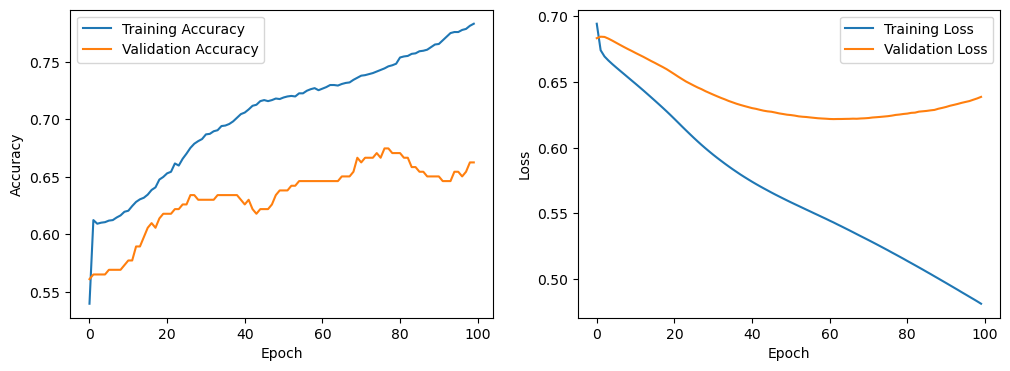

In [24]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(water_history.history['accuracy'], label='Training Accuracy')
plt.plot(water_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(water_history.history['loss'], label='Training Loss')
plt.plot(water_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

If deemed necessary, we can continue to train the model by calling the `fit()` method again, and Keras will continue where it left off. Try running the previous cells again, and check if we can improve our results.

Once we are satisfied with the model's performance, we can test it by calling the `evaluate()` method, providing the test data we set aside previously. It's important to note, the method will return values for the loss, as well as all the metrics specified when compiling the model.

In [25]:
test_loss, test_accuracy = water_model.evaluate(X_water_test,
                                                y_water_test, verbose=2)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

26/26 - 0s - 815us/step - accuracy: 0.6752 - loss: 0.6224
Test Accuracy: 67.52%


We can also use `sklearn`'s `ConfusionMatrixDisplay` to visualize the model's confusion matrix.

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


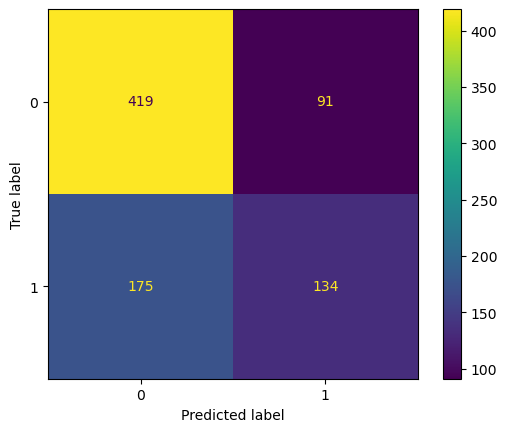

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_water_pred = water_model.predict(X_water_test).flatten().round()
cm = confusion_matrix(y_water_test, y_water_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

# Using the model to make predictions #

Finally, we can use our trained model to make predictions on new instances using the `predict()` method.

In [27]:
X_water_new = X_water_test[-10:] # pretend these are new instances
y_water_new = y_water_test[-10:]
y_water_pred = water_model.predict(X_water_new).flatten().round()
for i in range(10):
  print(f'Prediction: {y_water_pred[i]}, True: {y_water_new.iloc[i]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Prediction: 0.0, True: 1
Prediction: 0.0, True: 0
Prediction: 1.0, True: 1
Prediction: 0.0, True: 0
Prediction: 0.0, True: 0
Prediction: 0.0, True: 0
Prediction: 0.0, True: 0
Prediction: 1.0, True: 0
Prediction: 0.0, True: 0
Prediction: 0.0, True: 1


# Regression MLP #

We are now going to build a regression multi-layer Perceptron using Keras. General steps are pretty similar to the ones we followed in the previous example. Only needing to switch some configuration options regarding the inputs and outputs.

This time around we'll use the [California Housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html), a real-world dataset collected through California's 1990 census consisting of 20,640 samples and 9 features. This dataset is available through `sklearn`'s `datasets`module.

In [28]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)

We'll proceed with the usual data preprocessing steps.

In [29]:
housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [30]:
housing.data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [31]:
housing.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [32]:
housing.data.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [33]:
X_house_train, X_house_test, y_house_train, y_house_test = train_test_split(housing.data, housing.target)
X_house_train, X_house_valid, y_house_train, y_house_valid = train_test_split(X_house_train, y_house_train)

scaler = StandardScaler()
X_house_train = scaler.fit_transform(X_house_train)
X_house_valid = scaler.transform(X_house_valid)
X_house_test = scaler.transform(X_house_test)

We'll once again use the `Sequential` API to build, train and evaluate our model. However this time, we'll use a single output neuron without an activation function since we only need one output value which doesn't have a predefined range. We'll also use the mean squared error as our loss function since this is a regression problem.

Notice the use of the `add()` method from the `Sequential` class to build the model, instead of directly including our model's layers through its constructor.

Also, notice the use of the `validation_data` parameter this time, as we split the data ourselves.

In [34]:
house_model = keras.models.Sequential(name='house_value')
house_model.add(keras.layers.Input(shape=X_house_train.shape[1:], name='input'))
house_model.add(keras.layers.Dense(32, activation="relu", name='hidden_1'))
house_model.add(keras.layers.Dense(16, activation="relu", name='hidden_2'))
house_model.add(keras.layers.Dense(1, name='output'))

house_model.summary()

Model: "house_value"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
house_model.compile(loss="mean_squared_error", optimizer="sgd")

house_history = house_model.fit(X_house_train, y_house_train, epochs=50,
                    validation_data=(X_house_valid, y_house_valid))

Epoch 1/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 1.0596 - val_loss: 0.4914
Epoch 2/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 0.4770 - val_loss: 0.4214
Epoch 3/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.4351 - val_loss: 0.4083
Epoch 4/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 0.4087 - val_loss: 0.3878
Epoch 5/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 0.3840 - val_loss: 0.3685
Epoch 6/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.3744 - val_loss: 0.3713
Epoch 7/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 0.3663 - val_loss: 0.3583
Epoch 8/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.3602 - val_loss: 0.3520
Epoch 9/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 0.3567 - val_loss: 0.3497
Epoch 10/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.3518 - val_loss: 0.3432
Epoch 11/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 0.3480 - val_loss: 0.3400
Epoch 12/50
363/363 ━━━━━━━━━━

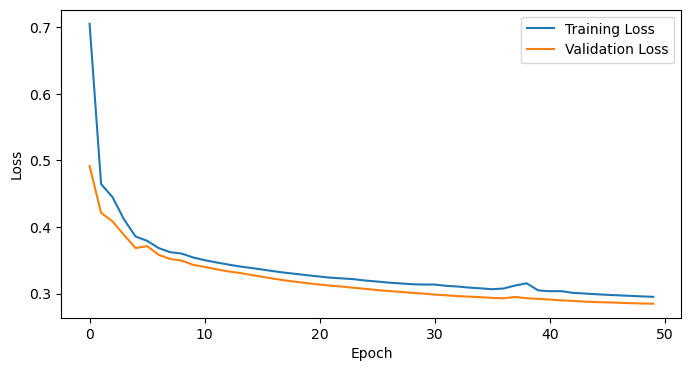

In [36]:
plt.figure(figsize=(8, 4))

plt.plot(house_history.history['loss'], label='Training Loss')
plt.plot(house_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Finally we can review the model's performance comparing predicted vs. expected for some of our testing samples.

In [37]:
mse_test = house_model.evaluate(X_house_test, y_house_test, verbose=2)
print(f"Test MSE: {mse_test}")

162/162 - 0s - 284us/step - loss: 0.3160
Test MSE: 0.31599679589271545


As well as use the trained model for predictions.

In [38]:
X_house_new = X_house_test[:10] # pretend these are new instances
y_house_pred = house_model.predict(X_house_new).flatten()
for i in range(10):
  print(f'Prediction: {y_house_pred[i]:.3f}, True: {y_house_test.iloc[i]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction: 2.803, True: 2.592
Prediction: 2.842, True: 2.596
Prediction: 1.118, True: 0.722
Prediction: 1.881, True: 1.757
Prediction: 1.612, True: 0.713
Prediction: 2.295, True: 3.0
Prediction: 1.074, True: 1.594
Prediction: 1.897, True: 1.614
Prediction: 2.548, True: 3.205
Prediction: 3.011, True: 2.667


# Conclusion

In this tutorial, we've covered the basics of creating a simple fully connected neural network using TensorFlow and Keras. You've learned how to load data, build a model, train it, and evaluate its performance. Keep in mind that most of this steps can be expanded significantly, with several different hyperparmeters and options that can be tuned or changed. Check the official [Keras API](https://keras.io/api/) for a deeper dive into its use.

*Parts of this tutorial have been adapted from [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/) By Aurélien Géron*